## *Лабораторна робота 6*
Дослідження та візуалізація даних за допомогою Pandas

# *Мета:*  отримати базові навики використання Pandas для дослідження та візуалізації даних

In [1]:
!pip  install kaggle kagglehub


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
kaggle_path = os.path.expanduser('~/.kaggle')
print(f"Шлях: {kaggle_path}")
print(f"Чи існує: {os.path.exists(kaggle_path)}")

Шлях: C:\Users\user/.kaggle
Чи існує: False


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("piterfm/2022-ukraine-russian-war")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 46.1k/46.1k [00:00<00:00, 23.6MB/s]

Extracting files...
Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\piterfm\2022-ukraine-russian-war\versions\470


In [6]:
!kaggle datasets download piterfm/2022-ukraine-russian-war -p .

Dataset URL: https://www.kaggle.com/datasets/piterfm/2022-ukraine-russian-war
License(s): CC-BY-NC-SA-4.0




  0%|          | 0.00/46.1k [00:00<?, ?B/s]
100%|##########| 46.1k/46.1k [00:00<?, ?B/s]


In [7]:
#розпакування архіва

import zipfile

with zipfile.ZipFile("2022-ukraine-russian-war.zip", "r") as zip_ref:
    zip_ref.extractall("data") #куди розпакувати

print("Розпаковано до папки 'data'")

Розпаковано до папки 'data'


In [9]:
#імпортуємо модуль для роботи з csv файлами
import csv
import numpy as np
import pandas as pd

In [2]:
N = ord("T") % 3 + 1
print(N)

1


## *Завдання 1*
Знайти добові втрати польової артилерії

In [3]:
df = pd.read_csv("./data/russia_losses_equipment.csv")
field_artillery = df['field artillery']
df

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles,submarines
0,2025-11-16,1362,428,347,11353,23591,34469,1543,NaN,NaN,81286,28,1244,4000.0,NaN,NaN,67464.0,3940.0,1.0
1,2025-11-15,1361,428,347,11350,23588,34443,1541,NaN,NaN,80877,28,1244,3998.0,NaN,NaN,67396.0,3940.0,1.0
2,2025-11-14,1360,428,347,11344,23569,34423,1540,NaN,NaN,80387,28,1242,3996.0,NaN,NaN,67306.0,3926.0,1.0
3,2025-11-13,1359,428,347,11344,23567,34388,1540,NaN,NaN,79945,28,1242,3996.0,NaN,NaN,67211.0,3926.0,1.0
4,2025-11-12,1358,428,347,11342,23556,34379,1540,NaN,NaN,79804,28,1240,3994.0,NaN,NaN,67123.0,3926.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,NaN,NaN
1357,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,NaN,NaN
1358,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN,NaN
1359,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
losses = field_artillery.iloc[::-1]
losses.head(10)

1360     49
1359     49
1358     50
1357     74
1356     77
1355     85
1354     90
1353    105
1352    105
1351    109
Name: field artillery, dtype: int64

In [6]:
#кількість елементів 
losses.shape

(1361,)

In [7]:
# знаходимо добові втрати
diff_arr = losses.diff()
diff_arr.shape

(1361,)

In [8]:
diff_arr.head(10)

1360     NaN
1359     0.0
1358     1.0
1357    24.0
1356     3.0
1355     8.0
1354     5.0
1353    15.0
1352     0.0
1351     4.0
Name: field artillery, dtype: float64

## *Завдання 2*
Знайти 3 найбільші добові втрати польової артилерії і визначити дати

In [10]:
# знаходимо максимум втрат
diff_arr.max()

np.float64(122.0)

In [11]:
# знаходимо 3 найбільші втрати
sorted(diff_arr)[-3:]

[101.0, 104.0, 122.0]

In [12]:
import datetime as dt
import time as tm
# індекс значення, що є максимумом
timedelta = np.argsort(diff_arr)[-3:][::-1]

timedelta

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  return bound(*args, **kwds)


0    1126
1    1121
2    1119
Name: field artillery, dtype: int64

In [13]:
start_war = dt.date(2022, 2, 25)

for i in range(3):
    k = timedelta[i]
    date_to_find = start_war + dt.timedelta(int(k))
    print(f"The most losses of field artillery was on \
    {date_to_find.strftime("%d")} \
    {date_to_find.strftime("%B")} \
    {date_to_find.strftime("%Y")}")

The most losses of field artillery was on     27     March     2025
The most losses of field artillery was on     22     March     2025
The most losses of field artillery was on     20     March     2025


## *Завдання 3*
Визначити скільки польової артилерії було знищено влітку 2025 року

In [14]:
summer_losses = 0

for i in range(len(diff_arr)):
    current_date = start_war + dt.timedelta(i)

    if current_date.year == 2025 and current_date.month in [6, 7, 8]:
        summer_losses += diff_arr.iloc[i]

print(f"Summer losses of field artillery {summer_losses} (units)")

Summer losses of field artillery 3724.0 (units)


## *Завдання 4*
Знайти середнє значення втрат артилерії за останні 300 днів війни

In [27]:
losses_during_300_days = diff_arr[-300:]

average_value = np.mean(losses_during_300_days)
print (f"Average losses during 300 days {average_value}")

Average losses during 300 days 41.31666666666667


In [44]:
diff_series = df['field artillery'].diff()

last_300_days = diff_series[-300:]

average_value = last_300_days.mean()
print(f"Average losses during last 300 days: {average_value}")

Average losses during last 300 days: 41.31666666666667


## *Завдання 5*
Створити графік втрат польової артилерії та танків за перший рік війни

In [34]:
df_table = df[['tank', 'field artillery']]
df_table.head(10)

,tank,field artillery
0,11353,34469
1,11350,34443
2,11344,34423
3,11344,34388
4,11342,34379
5,11342,34366
6,11342,34349
7,11335,34340
8,11330,34321
9,11330,34301


In [35]:
tank = tank[::-1]
field_artillery = field_artillery[::-1]

In [36]:
diff_arr_tanks = np.diff(tank)
diff_arr_artillery = np.diff(field_artillery)

In [37]:
diff_arr_tanks_first_year = diff_arr_tanks[:365]
diff_arr_artillery_first_year = diff_arr_artillery[:365]

x = np.arange(1, 366)

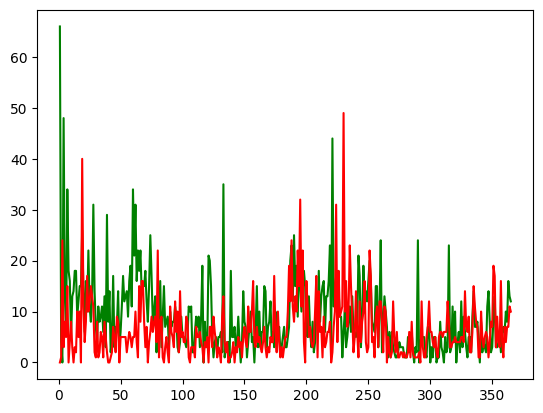

In [38]:
import matplotlib.pyplot as plt
plt.plot(x, diff_arr_tanks_first_year, color='green')
plt.plot(x, diff_arr_artillery_first_year, color='red')